## Case study for Lorenz attractor

- 同一視する半径$r$を変化させる
- 同じ軌道を異なる半径で集計する

この場合に収束の具合がどう変化するかを見る

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
with open("Lorenz.log") as f:
    log = [{ elem[0]:elem[1] for elem in [ f.split(":",2) for f in line.split("\t")]} for line in f]
df = pd.DataFrame(log).convert_objects(convert_numeric=True, copy=False)

In [4]:
np.unique(df["radius"])
dfs = []
for r in np.unique(df["radius"]):
    r_df = df[df["radius"] == r]
    dfs.append((r, r_df))

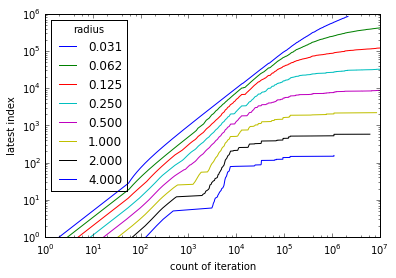

In [12]:
for r, d in dfs:
    count = d["count"]
    index = d["new_index"]
    plt.plot(count, index, label="{:.03f}".format(r))
plt.legend(loc=2, title="radius")
plt.xlabel("count of iteration")
plt.ylabel("latest index")
plt.xscale("log")
plt.yscale("log")

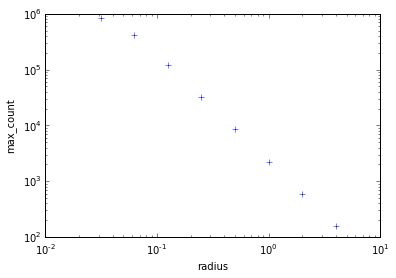

In [8]:
max_indices = np.array([(r, np.max(d["new_index"])) for r, d in dfs])
plt.plot(max_indices[:, 0], max_indices[:, 1], "+")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("radius")
plt.ylabel("max_count")